In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics, model_selection, ensemble, neighbors, svm, tree, neural_network, base
import matplotlib.pyplot as plt

import importlib
import datetime
import mlTest
import preprocessing
importlib.reload(mlTest)
importlib.reload(preprocessing)

<module 'preprocessing' from 'C:\\Users\\Chunlok Lo\\Documents\\cs4641\\supervised_learning\\implementation\\preprocessing.py'>

In [3]:
df = pd.read_csv("data/jsbach_chorals_harmony.data", header=None)

In [4]:
df = df.drop(0, axis=1)
df = df.drop(1, axis=1)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
1,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,5,C_M
2,YES,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,E,2,C_M
3,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,3,F_M
4,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,F,2,F_M
5,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,4,D_m
6,NO,NO,YES,NO,NO,YES,NO,NO,NO,YES,NO,NO,D,2,D_m
7,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,3,F_M
8,YES,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,A,2,F_M
9,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,YES,NO,Bb,5,BbM


In [5]:
df = preprocessing.convert_numeric(df, range(2, 17))

In [6]:
X, y = preprocessing.XySplit(df, 16)
X_train, X_val, X_test, X_train_val, y_train, y_val, y_test, y_train_val = mlTest.train_val_test_split(X, y, train_size=0.8, val_size=0.1)

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
y.describe()

count    5665.000000
mean       50.304501
std        29.955009
min         0.000000
25%        22.000000
50%        49.000000
75%        78.000000
max       101.000000
Name: 16, dtype: float64

Initial Performance Testing:

[[ 0  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  1  0]]
0.7301587301587301


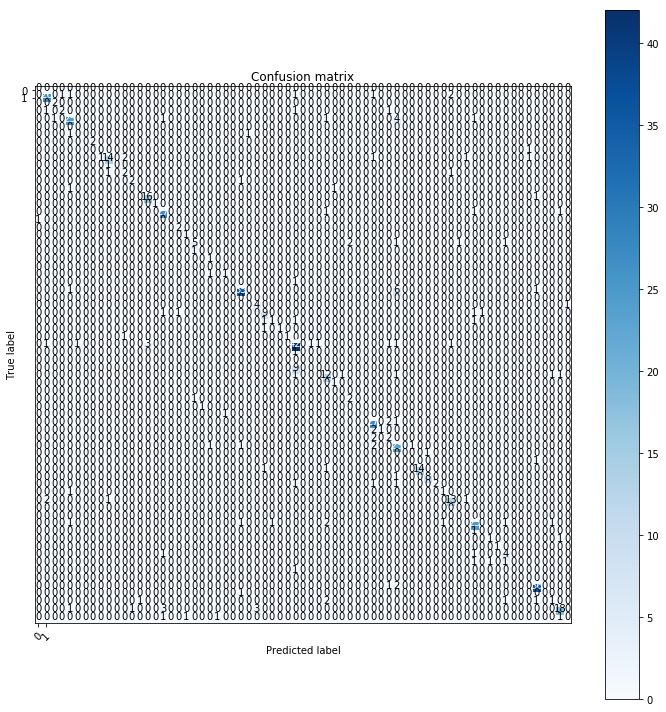

In [16]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_val, y_train_val)
cnf_matrix, accuracy = mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])
print(accuracy)

[[1157  107]
 [ 184  454]]


(array([[1157,  107],
        [ 184,  454]], dtype=int64), 0.8470031545741324)

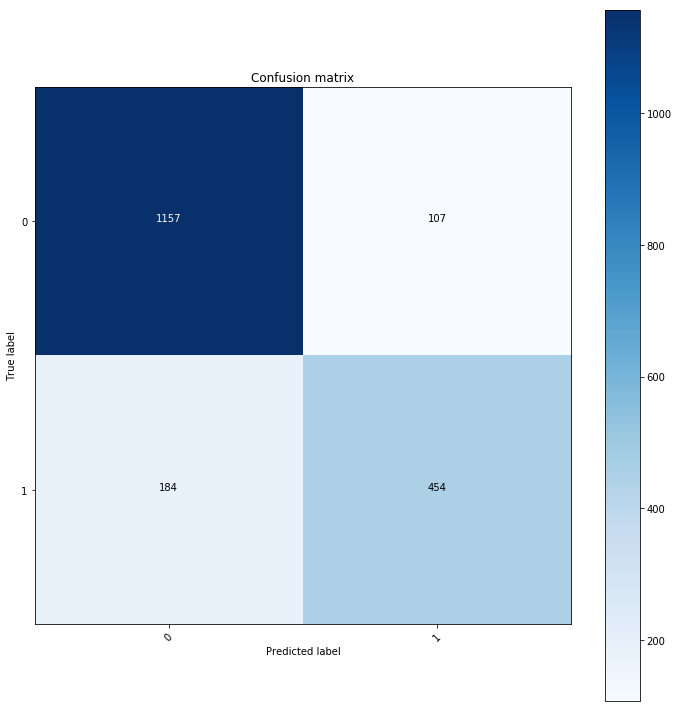

In [24]:
clf = ensemble.AdaBoostClassifier(random_state=0, n_estimators=200)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[35  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0  0]]


(array([[35,  0,  0, ...,  0,  0,  0],
        [ 2,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  1,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0, 18,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64), 0.7248677248677249)

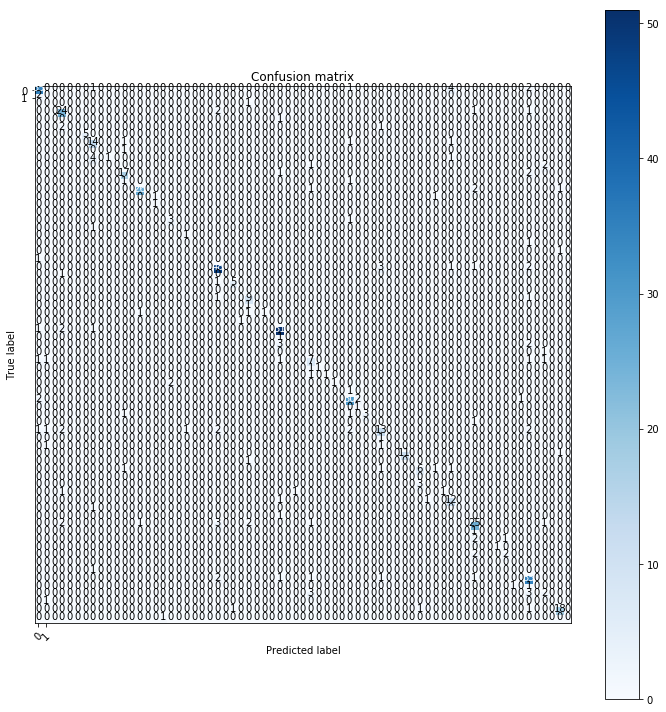

In [9]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[35  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  0  0 ...  0  0  0]]


(array([[35,  0,  0, ...,  0,  0,  0],
        [ 2,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  1,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0, 18,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64), 0.7248677248677249)

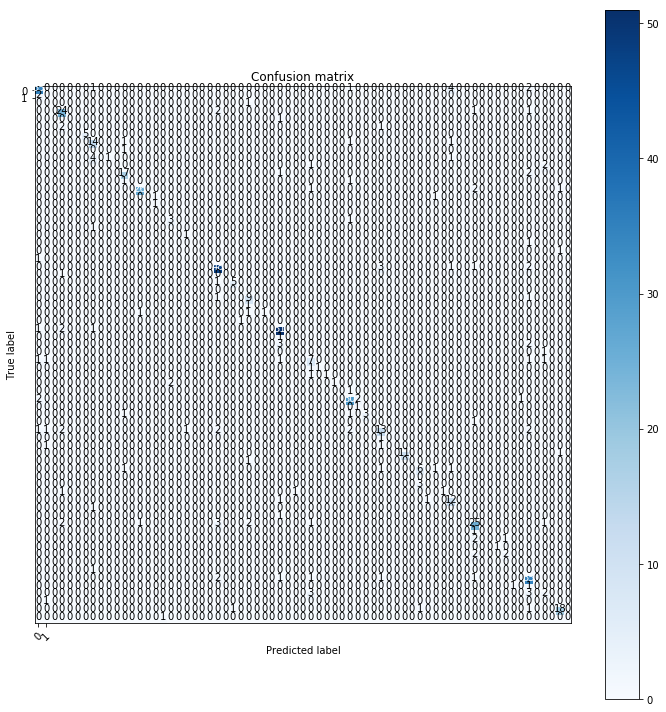

In [7]:
clf = svm.LinearSVC(random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU, Activation
import numpy as np

model = Sequential()
model.add(Dense(10,input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train.values, y_train.values, epochs=200, validation_data=(X_val.values, y_val.values))

Train on 15216 samples, validate on 1902 samples
Epoch 1/200
15216/15216 [==============================] - 3s 218us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 2/200
15216/15216 [==============================] - 3s 165us/step - loss: 5.7148 - acc: 0.0387 - val_loss: 5.5507 - val_acc: 0.0358
Epoch 3/200
 6176/15216 [===========>..................] - ETA: 1s - loss: 5.7468 - acc: 0.0368

KeyboardInterrupt: 

[[1132  132]
 [ 197  441]]


C:\Users\Chunlok Lo\AppData\Local\conda\conda\envs\magiclearning\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(array([[1132,  132],
        [ 197,  441]], dtype=int64), 0.8270241850683491)

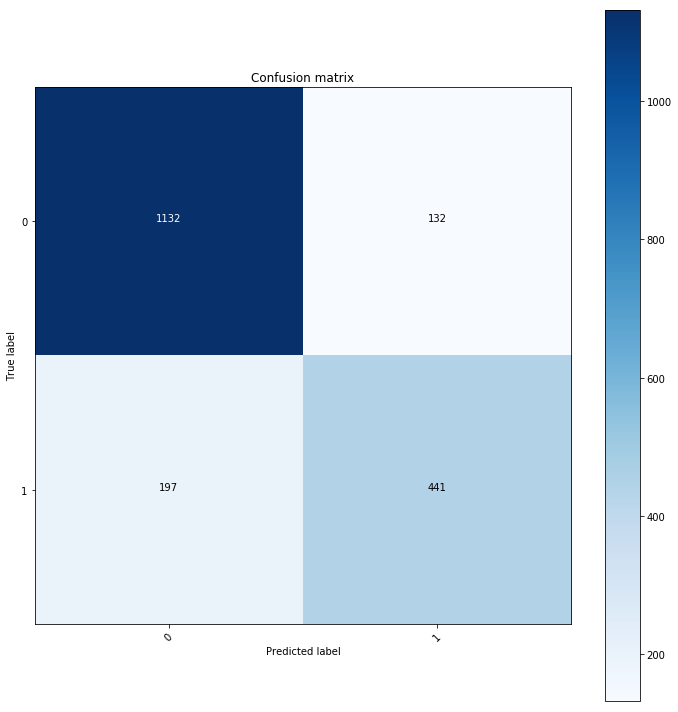

In [30]:
clf = neural_network.MLPClassifier(hidden_layer_sizes=(5, 2), random_state=0)
clf.fit(X_train_val, y_train_val)
mlTest.show_confusion_matrix(clf, X_test, y_test, classes=[0, 1])

Algorithm Testing:

Decision Tree Classifier:
Testing: Pruning parameter min_impurity_decrease
Testing: Max Depth

0.8488141601621176
0.00022222222222222223


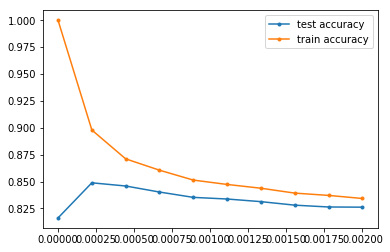

In [62]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

Processing Param Val: 20.088888888888899
0.8437911029239062
9.444444444444445


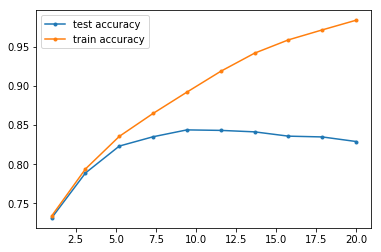

In [64]:
param = ('max_depth', np.linspace(1, 20, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="max_depth-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="max_depth-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="max_depth-vals")

Min impurity decrease with max depth did not improve performance. So I just left it out.

Processing Param Val: 0.00277777777777777797
0.8505084267821736
0.0006666666666666668


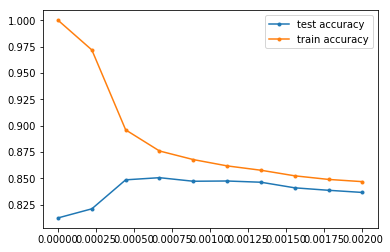

In [66]:
param = ('min_impurity_decrease', np.linspace(0, .002, num=10))
classifier = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
# mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="impurity-train_acc")
# mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="impurity-test_acc")
# mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="impurity-vals")

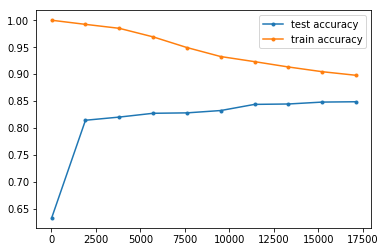

In [75]:
#clf = tree.DecisionTreeClassifier(random_state=0, min_impurity_decrease=0.00022222222222222223)
#train_acc, test_acc, train_samples = mlTest.accuracy_vs_num_train_samples(clf, X_train_val, y_train_val, min_train_num=20)
mlTest.plot_accuracy(train_acc, test_acc, train_samples)

In [76]:
mlTest.saveNpArray(train_acc, "MAGIC-decisionTree", descriptors="tuned-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-decisionTree", descriptors="tuned-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-decisionTree", descriptors="tuned-vals")

ADA BOOST TESTING


Testing: n_estimators
learning rate?

Processing Param Val: 150
0.8492232776372785
150


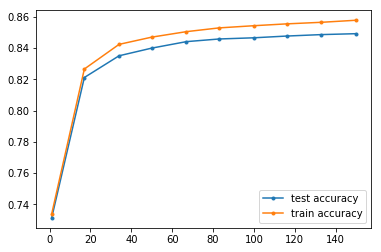

In [95]:
param = ('n_estimators', np.linspace(1, 150, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(train_acc, test_acc, param_vals)
mlTest.saveNpArray(train_acc, "MAGIC-ADABoost", descriptors="n_estimators-train_acc")
mlTest.saveNpArray(test_acc, "MAGIC-ADABoost", descriptors="n_estimators-test_acc")
mlTest.saveNpArray(param_vals, "MAGIC-ADABoost", descriptors="n_estimators-vals")

Processing Param Val: 80
0.8492232776372785
150


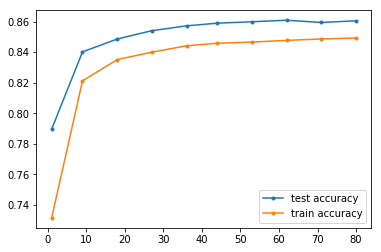

In [96]:
param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc1, test_acc1, param_vals1 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
mlTest.saveNpArray(train_acc1, "MAGIC-decisionTree", descriptors="n_estimators-train_acc-depth2")
mlTest.saveNpArray(test_acc1, "MAGIC-decisionTree", descriptors="n_estimators-test_acc-depth2")
mlTest.saveNpArray(param_vals1, "MAGIC-decisionTree", descriptors="n_estimators-vals-depth2")

0.8685598819076127
53


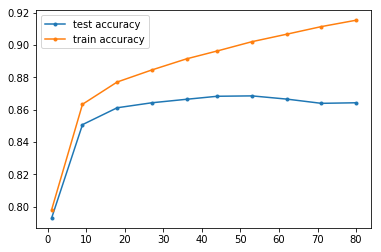

In [19]:
#param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=3), random_state=0)
#train_acc3, test_acc3, param_vals3 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc3))
print(param_vals3[np.argmax(test_acc3)])
mlTest.plot_accuracy(train_acc3, test_acc3, param_vals3)
mlTest.saveNpArray(train_acc3, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth3")
mlTest.saveNpArray(test_acc3, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth3")
mlTest.saveNpArray(param_vals3, "MAGIC-adaboost", descriptors="learning_rate-vals-depth3")

0.8623097794916893
18


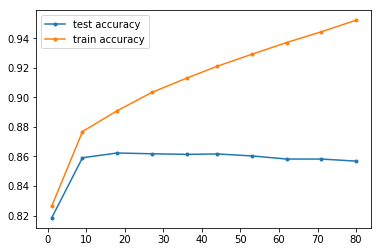

In [21]:
#\param = ('n_estimators', np.linspace(1, 80, num=10, dtype=int))
#classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=4), random_state=0)
#train_acc4, test_acc4, param_vals4 = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc4))
print(param_vals3[np.argmax(test_acc4)])
mlTest.plot_accuracy(train_acc4, test_acc4, param_vals4)
mlTest.saveNpArray(train_acc4, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth4")
mlTest.saveNpArray(test_acc4, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth4")
mlTest.saveNpArray(param_vals4, "MAGIC-adaboost", descriptors="learning_rate-vals-depth4")

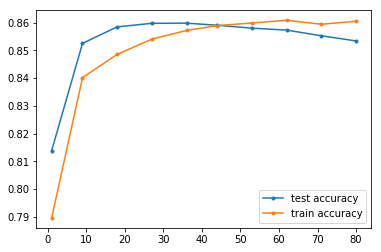

In [94]:
mlTest.plot_accuracy(test_acc1, test_acc3, param_vals3)

In [7]:
param = ('learning_rate', np.linspace(1, 0, num=10))
classifier = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0, max_depth=2), random_state=0)
train_acc, test_acc, param_vals = mlTest.paramTest(classifier, param, X_train_val, y_train_val, scoring='accuracy')
print(np.max(test_acc))
print(param_vals[np.argmax(test_acc)])
mlTest.plot_accuracy(test_acc, test_acc1, param_vals1)
# mlTest.saveNpArray(train_acc1, "MAGIC-adaboost", descriptors="learning_rate-train_acc-depth2")
# mlTest.saveNpArray(test_acc1, "MAGIC-adaboost", descriptors="learning_rate-test_acc-depth2")
# mlTest.saveNpArray(param_vals1, "MAGIC-adaboost", descriptors="learning_rate-vals-depth2")

KeyboardInterrupt: 

In [13]:
acc = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-test_acc-depth2.npy")

In [14]:
vals = np.load("npData/20190206-021010_MAGIC-adaboost_n_estimators-vals-depth2.npy")

In [15]:
vals[np.argmax(acc)]

62

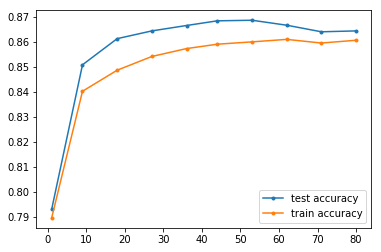

In [16]:
mlTest.plot_accuracy(acc, test_acc3, param_vals3)